In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from statistics import mean, stdev
import seaborn as sns
import tkinter
import matplotlib
import collections
import json
from operator import itemgetter

In [2]:
dt = pd.read_csv("finaleGiusto.csv")

In [3]:
dt.head()

,#A,B,Weight
0,7364,3512,2
1,18570,3512,1
2,13728,7040,6
3,7040,1480,1
4,7040,4429,1


In [4]:
dt2 = dt.drop(columns = "Weight")

In [5]:
#dataset senza il peso dei link
dt2.to_csv(r'C:\Users\Utente\Desktop\SnaProject\dati.csv', index = False)

In [6]:
G = nx.read_edgelist("dati.csv", delimiter = ",", create_using = nx.DiGraph)

In [7]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 19025
Number of edges: 232168
Average in degree:  12.2033
Average out degree:  12.2033


In [8]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.0006414692720945063


In [9]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('9666', 5006)
('4235', 2834)
('13169', 2770)
('1784', 2665)
('19298', 2488)
('10211', 2248)
('9820', 1950)
('12907', 1847)
('1504', 1725)
('4861', 1650)
('8732', 1558)
('7777', 1502)
('14531', 1473)
('3190', 1449)
('12983', 1393)
('13728', 1301)
('2339', 1295)
('17606', 1280)
('4429', 1275)
('3014', 1154)


In [10]:
test_path = nx.shortest_path(G, source = "9666", target = "4235")

print("Shortest path between 'Coronavirus (2019-nCoV)' and 'USA Politics and Governament' :", test_path)
print("Number of edges of that path:", len(test_path)-1)

Shortest path between 'Coronavirus (2019-nCoV)' and 'USA Politics and Governament' : ['9666', '13805', '4235']
Number of edges of that path: 2


In [11]:
print("Number selfloops:",nx.number_of_selfloops(G))

Number selfloops: 0


In [12]:
print("Avg Clustering coefficient:",nx.average_clustering(G))

Avg Clustering coefficient: 0.42758410021070814


# Creating different models

In [37]:
in_degree_sequence = [d for n, d in G.in_degree()]  
out_degree_sequence = [d for n, d in G.out_degree()]
cm = nx.directed_configuration_model(in_degree_sequence, out_degree_sequence) # creiamo Directed Configuration Model
cm = nx.DiGraph(cm)

In [38]:
ws = nx.watts_strogatz_graph(G.number_of_nodes(), 8, 0.5)

In [39]:
er = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges()) # Erdős-Rényi graph

In [40]:
ba = nx.barabasi_albert_graph(G.number_of_nodes(), 5) # Barabási–Albert graph

In [41]:
nx.write_graphml(G, "G.graphml")
nx.write_graphml(er, "ER.graphml")
nx.write_graphml(cm, "CM.graphml")
nx.write_graphml(ba, "BA.graphml")
nx.write_graphml(ws, "WS.graphml")

# MODELLI

In [15]:
er = nx.read_graphml(r'C:\Users\Utente\Desktop\SnaProject\modelli\ER.graphml')
cm = nx.read_graphml(r'C:\Users\Utente\Desktop\SnaProject\modelli\CM.graphml')
ba = nx.read_graphml(r'C:\Users\Utente\Desktop\SnaProject\modelli\BA.graphml')
ws = nx.read_graphml(r'C:\Users\Utente\Desktop\SnaProject\modelli\WS.graphml')

In [16]:
# controllo nodi e archi nei modelli
print("CM nodes:",cm.number_of_nodes())
print("CM edges:",cm.number_of_edges())
print("ER nodes:",er.number_of_nodes())
print("ER edges:",er.number_of_edges())
print("WS nodes:",ws.number_of_nodes())
print("WS edges:",ws.number_of_edges())
print("BA nodes:",ba.number_of_nodes())
print("BA edges:",ba.number_of_edges())

CM nodes: 19027
CM edges: 223535
ER nodes: 19027
ER edges: 232169
WS nodes: 19027
WS edges: 76108
BA nodes: 19027
BA edges: 76092


## Plot functions

In [17]:
def degree_dist_plot(graphs):
    fig = plt.figure(figsize = (16,8), dpi = 300)
    labels = []
    for i in graphs:
        if i[0].is_directed():
            degrees = i[0].in_degree() # dizionario node:degree
        else:
            degrees = i[0].degree() # dizionario node:degree
        values = sorted(set([v for k, v in degrees]))
        hist = [[v for k, v in degrees].count(x) for x in values]
        labels.append(i[1])
        if(i[1] == "Real World"):
            plt.loglog(values, hist, 'o-') # in-degree
        else:
            plt.loglog(values, hist, 'o') # in-degree
    fontsize = 15
    
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Degree", fontsize=fontsize)
    plt.ylabel("Number of nodes", fontsize=fontsize)
    plt.title("Degree Distribution", fontsize=fontsize)
    plt.legend(labels, fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    
    plt.xlim([0, 2*10**2])
    
    # Rimuove i borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [19]:
def dist_plot(data, title):
    fig = plt.figure(figsize = (16,8), dpi = 300)
    ax = fig.add_subplot(111)

    for k, v in data.items():
        sns.distplot(v["list"], label = v["name"], hist = False)
    
    fontsize = 15
    
    plt.yticks(fontsize = fontsize, alpha = 1)
    plt.xlabel(title, fontsize = fontsize)
    plt.ylabel("Density", fontsize = fontsize)
    plt.title(title + " Density Plot", fontsize=fontsize)
    plt.legend(fontsize = fontsize)
    plt.grid(axis = 'both', alpha = .3)
    plt.xscale("log")
    

    # Rimuove i borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [20]:
def box_plot(data, title):
    plot_list = []
    labels = []
    for k, v in data.items():
        plot_list.append(v["list"])
        labels.append(v["name"])
    fig = plt.figure(figsize = (16,8), dpi = 300)
    ax = fig.add_subplot(111)
    plt.boxplot(plot_list,labels = labels)
    
    fontsize = 15
    
    plt.yticks(fontsize = fontsize, alpha = 1)
    plt.xlabel('Models', fontsize = fontsize)
    plt.ylabel(title, fontsize = fontsize)
    plt.title(title + " Box Plot", fontsize=fontsize)
    plt.grid(axis = 'both', alpha = .3)
    plt.yscale("log")
    
    # Rimuove i borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

### Connected Components

In [23]:
print("Connected components: ")
print("ER network: " +str(nx.number_connected_components(er.to_undirected())))
print("BA network: " +str(nx.number_connected_components(ba)))
print("CM network: " +str(nx.number_connected_components(cm.to_undirected())))
print("WS network: " +str(nx.number_connected_components(ws)))
print("Real world network: "+ str(nx.number_connected_components(G.to_undirected())))
print("\n")

Connected components: 
ER network: 1
BA network: 1
CM network: 1
WS network: 1
Real world network: 4




In [24]:
print("CM weakly components: "+ str(nx.number_weakly_connected_components(cm)))

CM weakly components: 1


In [25]:
print("CM strongly components: "+ str(nx.number_strongly_connected_components(cm)))

CM strongly components: 3595


## Shortest Paths

In [27]:
for nodes in nx.connected_components(G.to_undirected()):   
    subgraph = nx.subgraph(G, nodes)   
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    G_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%G_path)

Number of Nodes: 19006
Average Shortest Path: 2
Number of Nodes: 5
Average Shortest Path: 0
Number of Nodes: 2
Average Shortest Path: 0
Number of Nodes: 12
Average Shortest Path: 0


In [28]:
for nodes in nx.weakly_connected_components(cm):
    subgraph = nx.subgraph(cm, nodes)      
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    cm_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%cm_path)

Number of Nodes: 19027
Average Shortest Path: 2


In [29]:
for nodes in nx.connected_components(er.to_undirected()):
    subgraph = nx.subgraph(er, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    er_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%er_path)

Number of Nodes: 19027
Average Shortest Path: 4


In [30]:
for nodes in nx.connected_components(ba):
    subgraph = nx.subgraph(ba, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    ba_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%ba_path)

Number of Nodes: 19027
Average Shortest Path: 4


In [31]:
for nodes in nx.connected_components(ws):
    subgraph = nx.subgraph(ws, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    ws_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%ws_path)

Number of Nodes: 19027
Average Shortest Path: 5


## Densità

In [32]:
print("Densità: ")

G_cc = nx.density(G)
print("Real world network: "+str(G_cc))
er_net_cc = nx.density(er)
print("ER network: "+str(er_net_cc))
ba_cc = nx.density(ba)
print("BA network: "+str(ba_cc))
ws_cc = nx.density(ws)
print("WS network: "+str(ws_cc))
cm_cc = nx.density(cm)
print("CM network: "+str(cm_cc))

Densità: 
Real world network: 0.0006414692720945063
ER network: 0.0006413371834834608
BA network: 0.00042038884575997226
WS network: 0.00042047724166929465
CM network: 0.0006174868621994125


## Degree Distribution

In [33]:
degree_sequence = sorted([d for n, d in G.degree()], reverse = True)
dmax = max(degree_sequence)
print("Maximum degree:",dmax)

Maximum degree: 5006


In [34]:
degree_sequence = sorted([d for n, d in G.degree()], reverse = True)
dmin = min(degree_sequence)
print("Minimum degree:",dmin)

Minimum degree: 1


In [35]:
graphs = [(G, "Real World"), (ba, "Barabási–Albert"), (er, "Erdős-Rényi"), (ws, "Watts Strogatz"), (cm, "Configuration Model")]

<ipython-input-17-017047a7d369>:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 2*10**2])


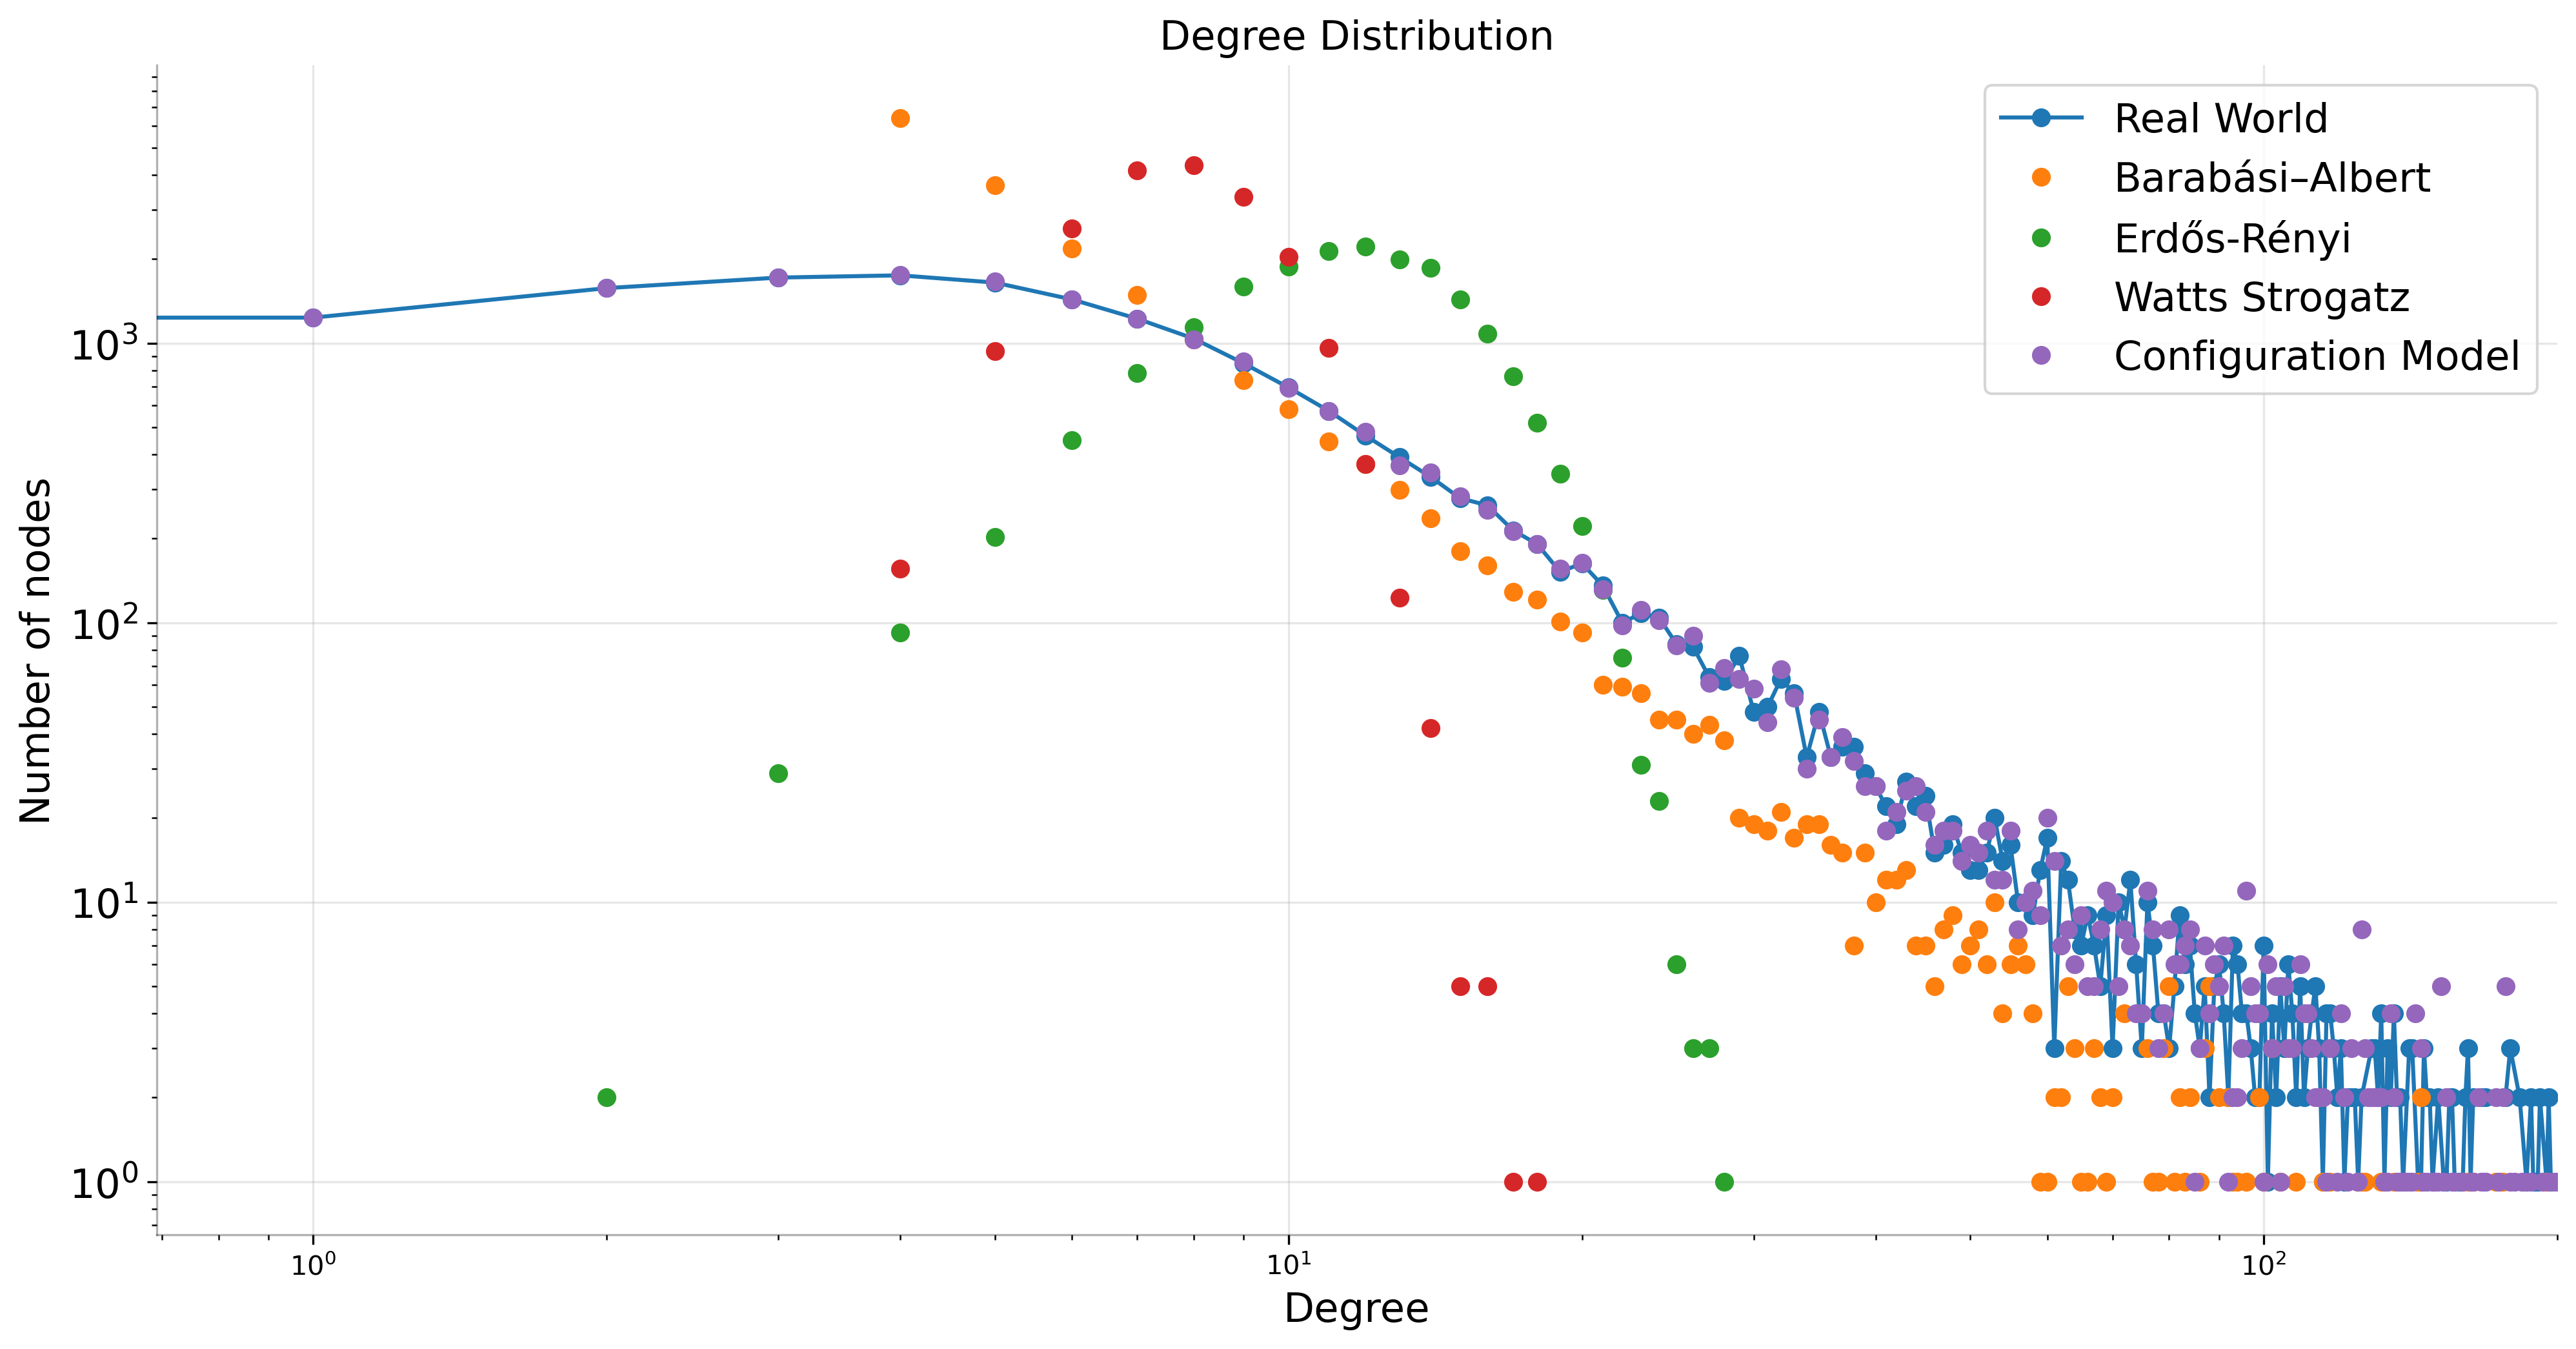

In [36]:
degree_dist_plot(graphs)

## Average Clustering Coefficient

In [37]:
G_cc = nx.average_clustering(G)
print('Real world average cluster coefficient: ' + str(G_cc) + '\n')
er_net_cc = nx.average_clustering(er)
print('Random network average cluster coefficient: ' + str(er_net_cc) + '\n')
ba_net_cc = nx.average_clustering(ba)
print('Barabasi Albert network average cluster coefficient: ' + str(ba_net_cc) + '\n')
ws_net_cc = nx.average_clustering(ws)
print('WS network average cluster coefficient: ' + str(ws_net_cc) + '\n')
cm_net_cc = nx.average_clustering(cm)
print('CM network average cluster coefficient: ' + str(cm_net_cc) + '\n')

Real world average cluster coefficient: 0.42758410021070814

Random network average cluster coefficient: 0.0006508066469393493

Barabasi Albert network average cluster coefficient: 0.0035332111558352853

WS network average cluster coefficient: 0.08353888568057866

CM network average cluster coefficient: 0.05895108942043493



## Clustering Coefficient Distribution

In [38]:
clustering_g = nx.clustering(G)
clustering_er = nx.clustering(er)
clustering_ba = nx.clustering(ba)
clustering_ws = nx.clustering(ws)
clustering_cm = nx.clustering(cm)

In [39]:
data = [[min(clustering_g.values()),min(clustering_er.values()),min(clustering_ba.values()), min(clustering_ws.values()), min(clustering_cm.values())]        
        ,[max(clustering_g.values()),max(clustering_er.values()),max(clustering_ba.values()), max(clustering_ws.values()), max(clustering_cm.values())]
        ,[mean(clustering_g.values()),mean(clustering_er.values()),mean(clustering_ba.values()), mean(clustering_ws.values()), mean(clustering_cm.values())]
        ,[stdev(clustering_g.values()),stdev(clustering_er.values()),stdev(clustering_ba.values()), stdev(clustering_ws.values()), stdev(clustering_cm.values())]
        ]
print('Clustering Coefficient')
pd.DataFrame(data, columns = ['Real World','Erdos-Renyi','Barabasi-Albert', 'WS', 'Configuration Model'],index = ['min','max','mean','stdev'])

Clustering Coefficient


,Real World,Erdos-Renyi,Barabasi-Albert,WS,Configuration Model
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.500000,0.014286,0.500000,0.800000,1.000000
mean,0.427584,0.000651,0.003533,0.083539,0.058951
stdev,0.123593,0.001148,0.020121,0.078097,0.070937


In [40]:
clustering_coeff_data = {
    "real_word":{
        "name":"Real World",
        "list":list(clustering_g.values())
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":list(clustering_er.values())
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":list(clustering_ws.values())
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":list(clustering_ba.values())
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":list(clustering_cm.values())
    }
}
real_world_coeff_data = {
    "real_word":{
        "name":"Real World",
        "list":list(clustering_g.values())
    }
}

C:\Users\scali\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


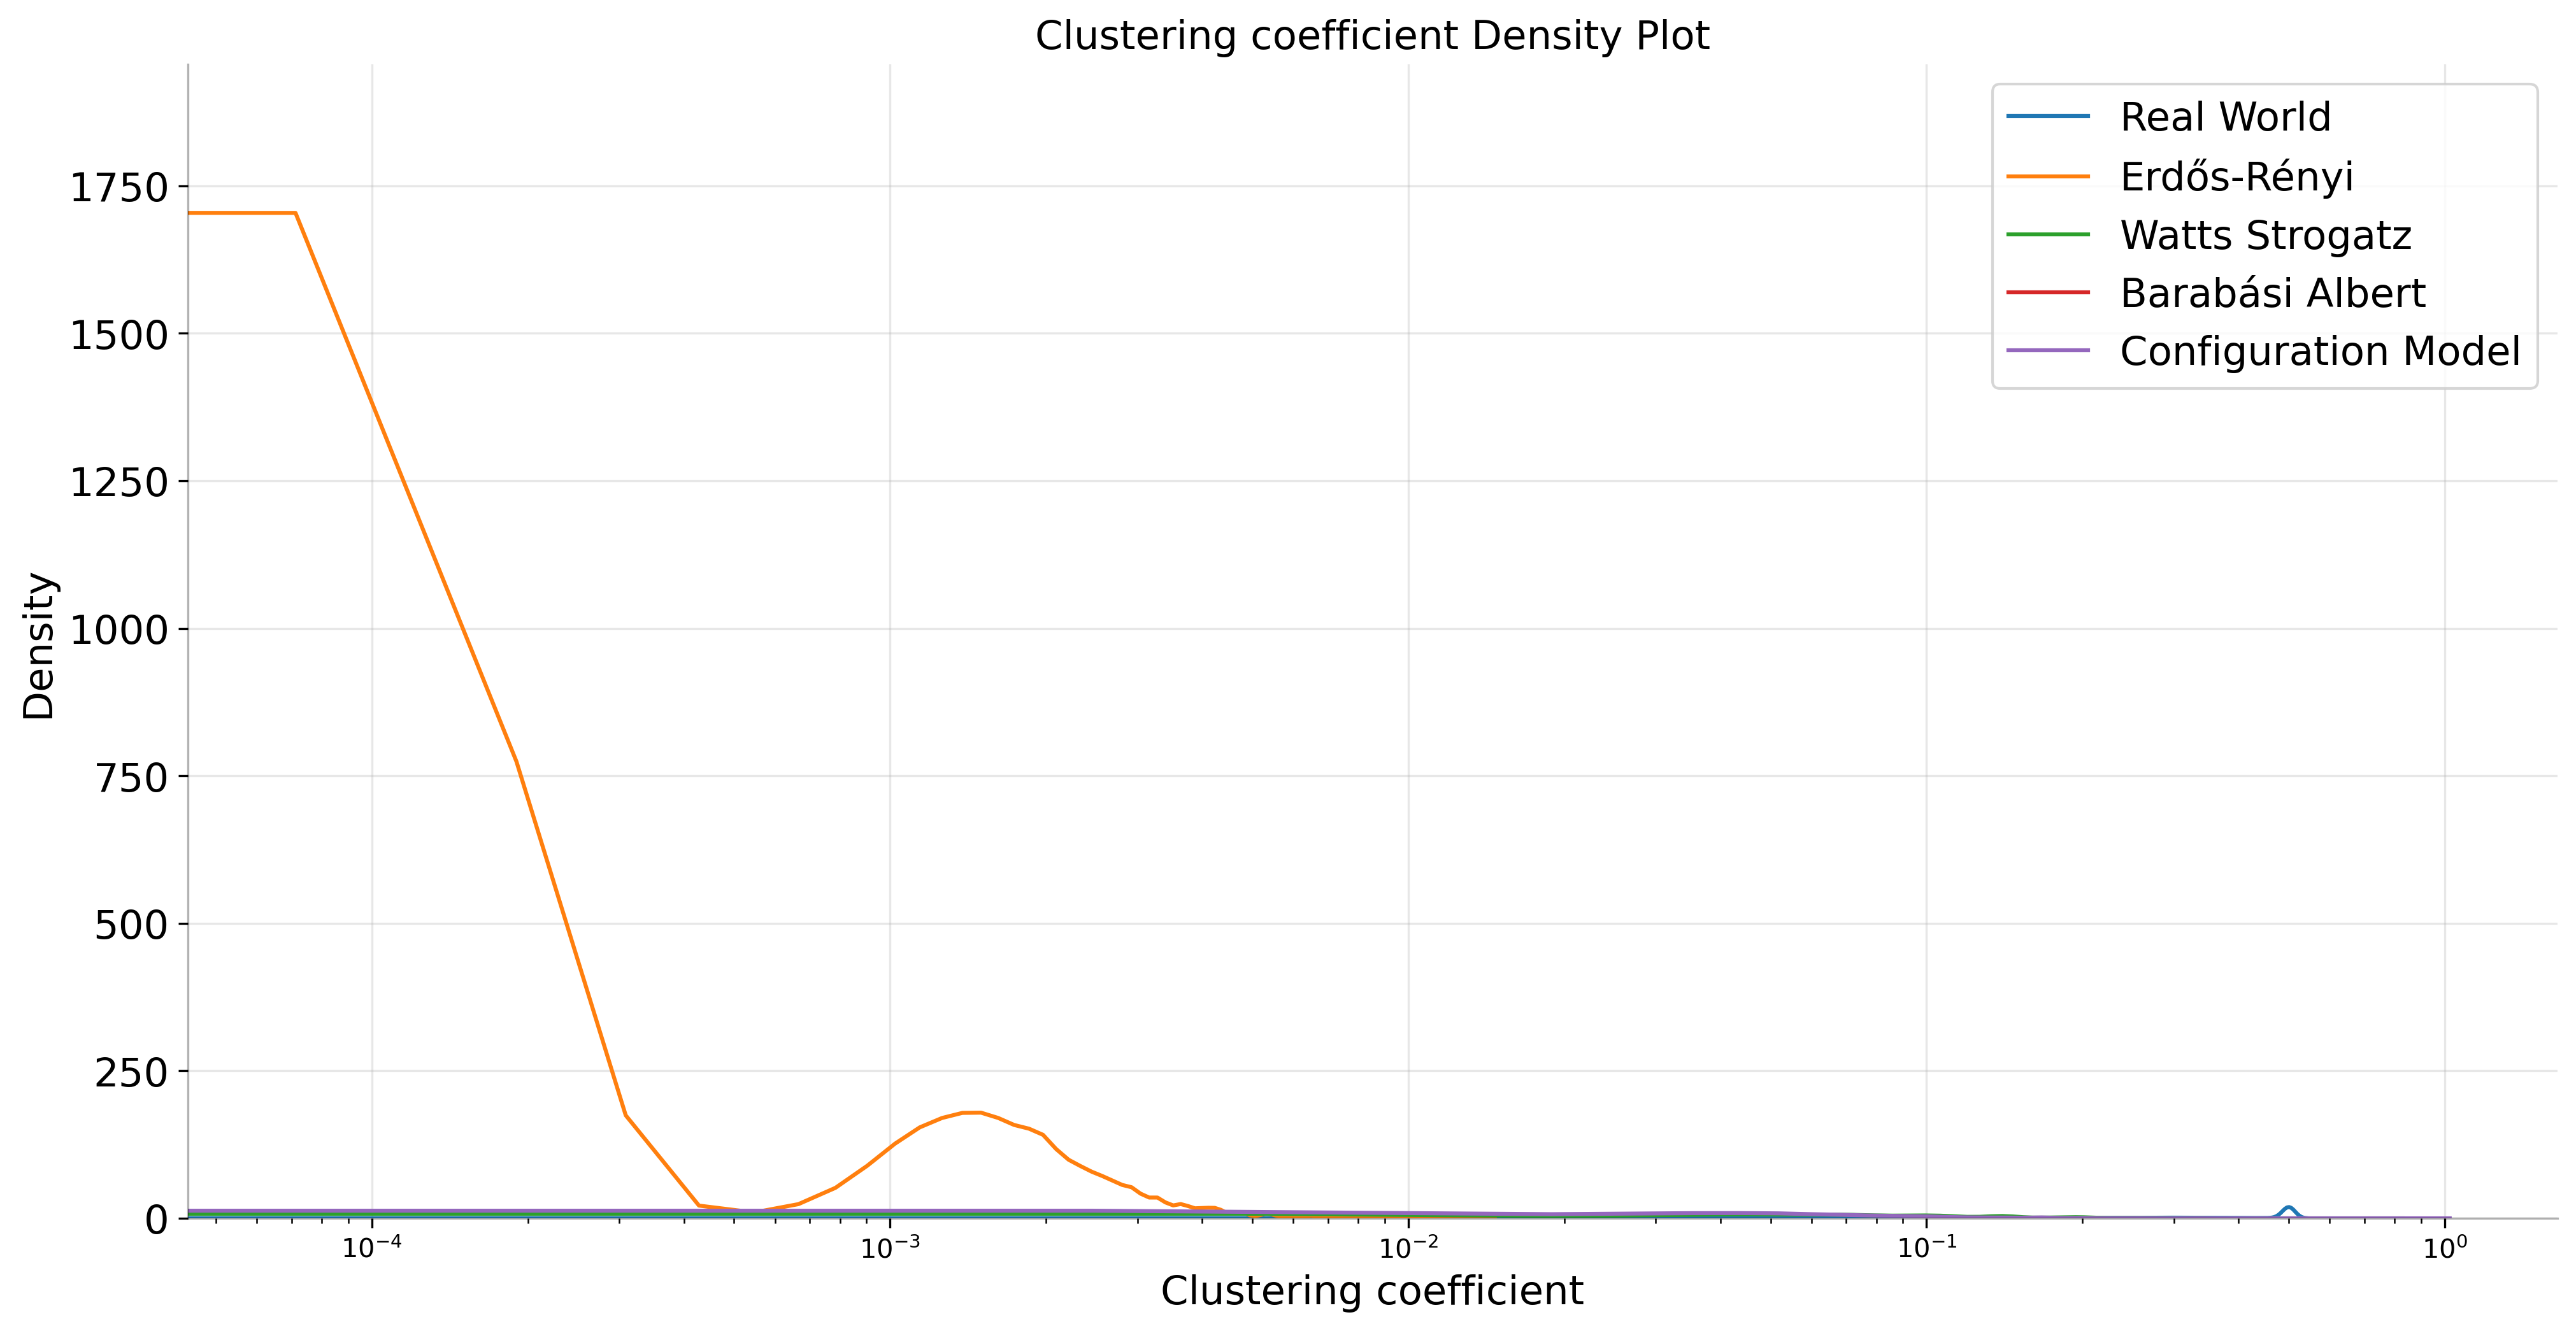

In [41]:
dist_plot(clustering_coeff_data, "Clustering coefficient")

In [46]:
clustering_coeff_data2 = {
    "real_word":{
        "name":"Real World",
        "list":list(clustering_g.values())
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":list(clustering_ws.values())
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":list(clustering_ba.values())
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":list(clustering_cm.values())
    }
}
real_world_coeff_data = {
    "real_word":{
        "name":"Real World",
        "list":list(clustering_g.values())
    }
}

C:\Users\scali\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


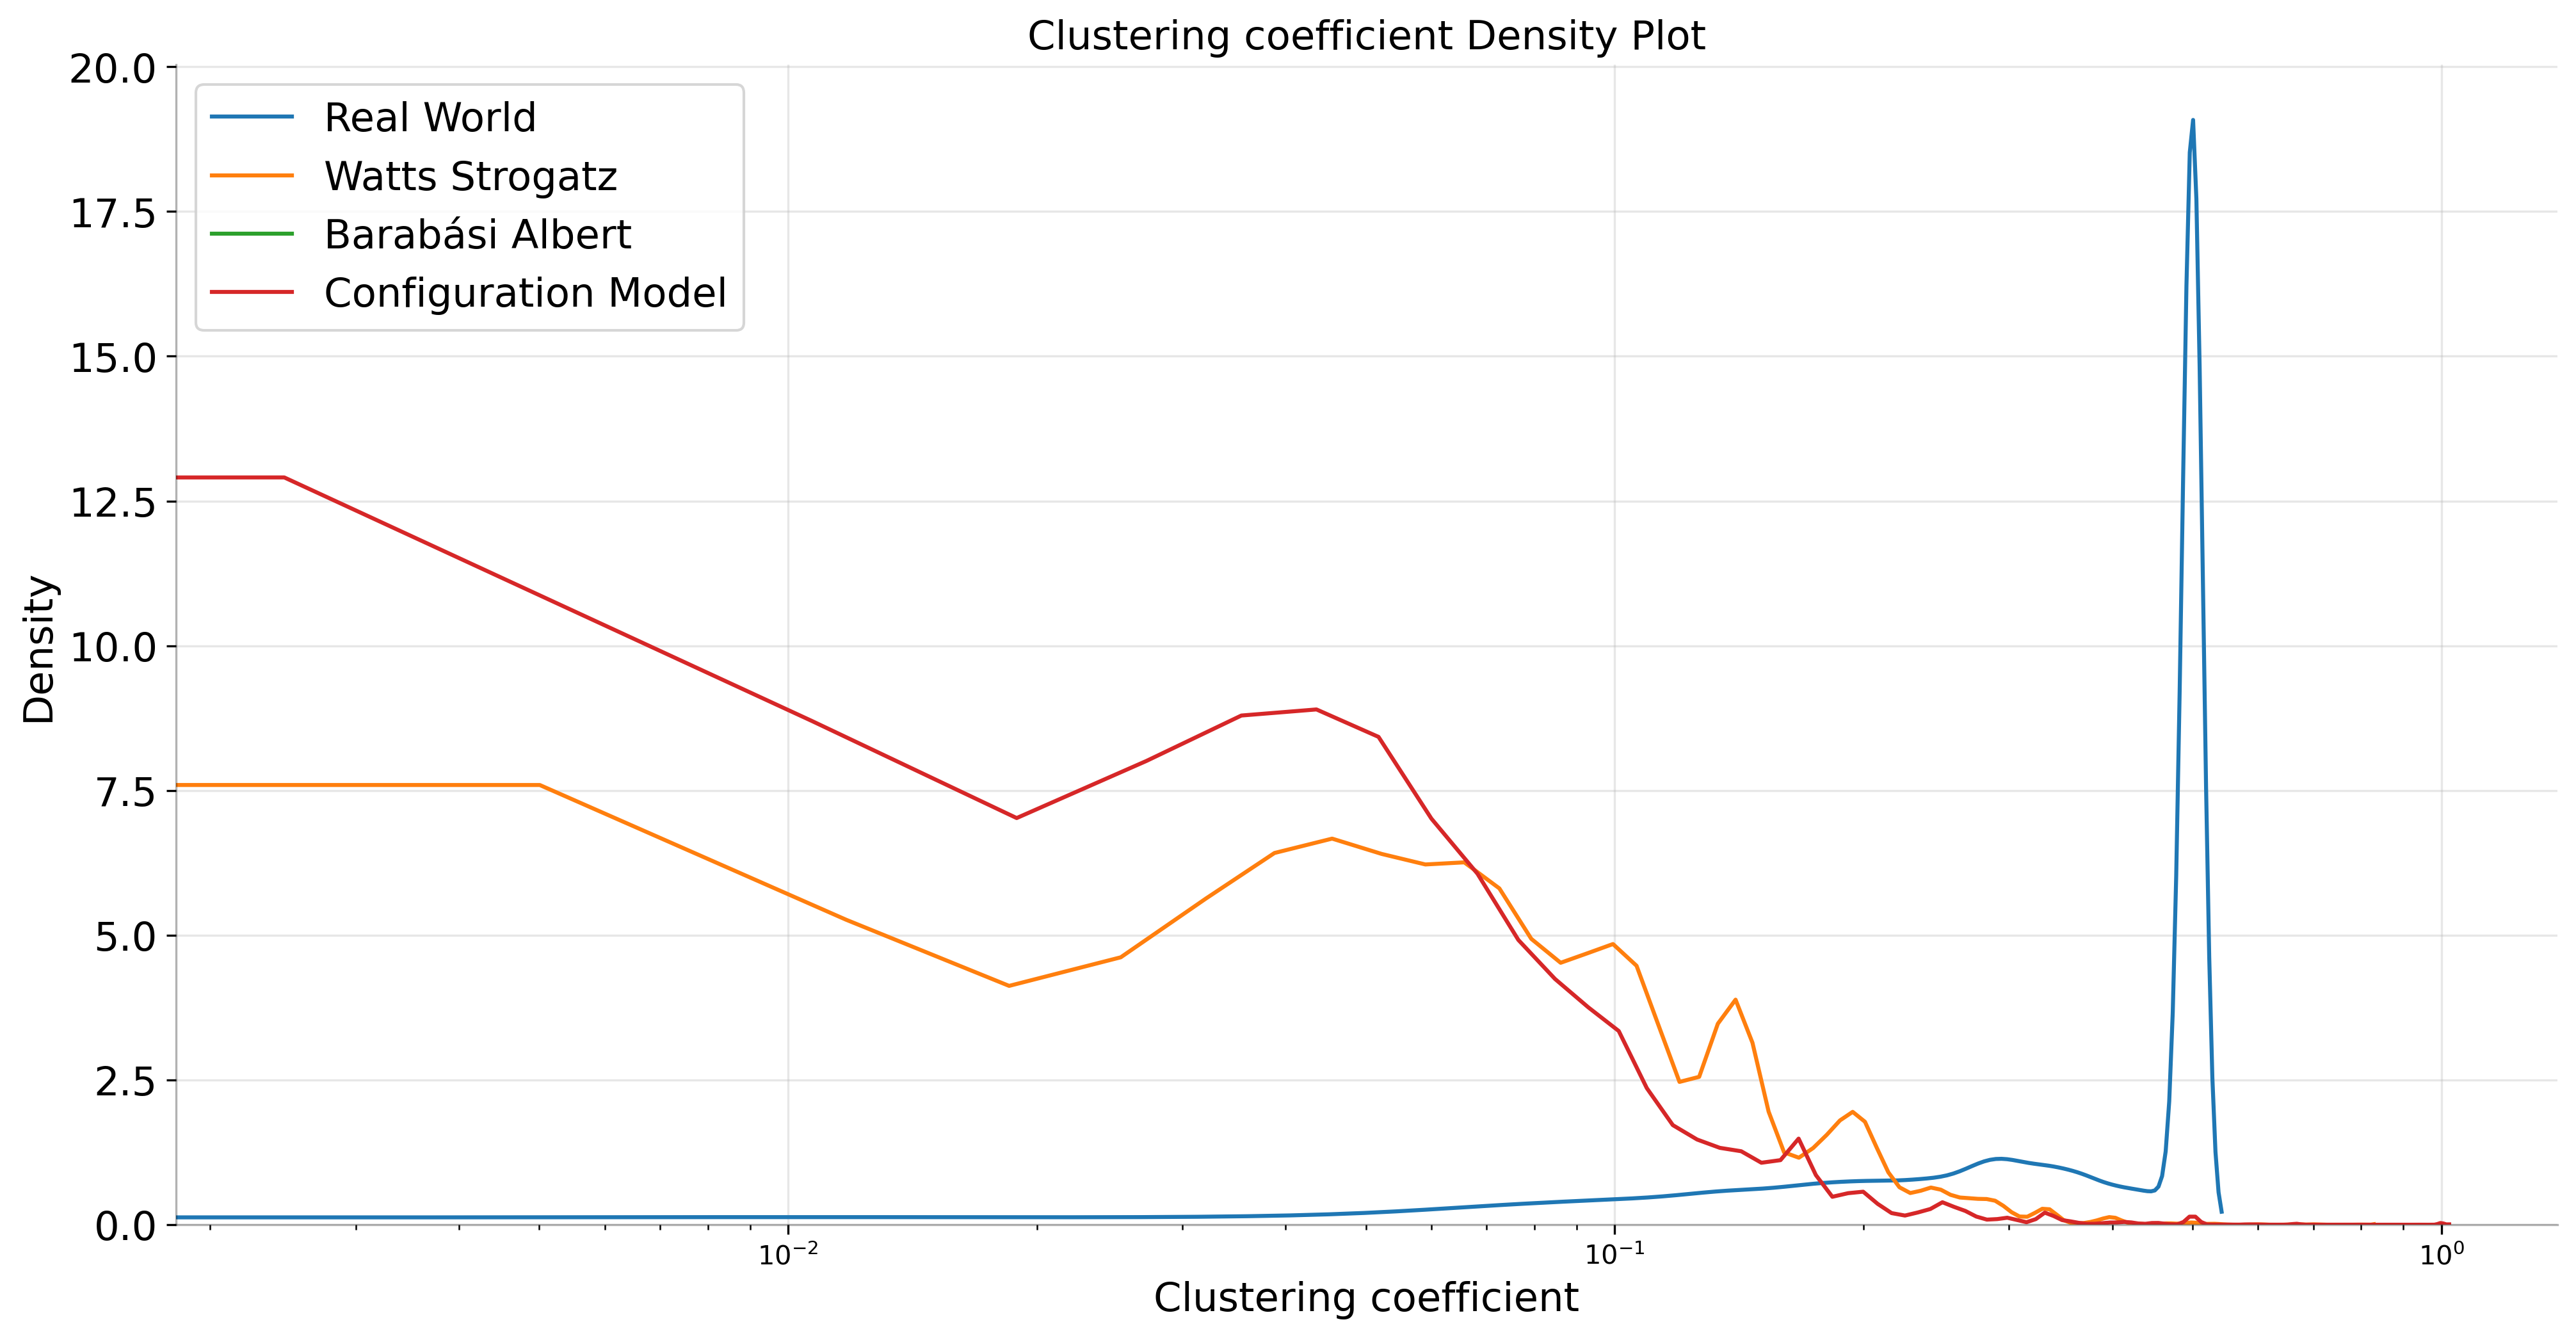

In [47]:
dist_plot(clustering_coeff_data2, "Clustering coefficient")